In [1]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('hi1_20170701_20200609.csv')

# 打印前五行
print(df.head())


       date   time  hi1_open  hi1_high  hi1_low  hi1_close  hi1_volume
0  20170703  91400   25524.0   25524.0  25524.0    25524.0       639.0
1  20170703  91500   25530.0   25557.0  25506.0    25547.0       941.0
2  20170703  91600   25549.0   25564.0  25547.0    25560.0       371.0
3  20170703  91700   25558.0   25568.0  25549.0    25568.0       383.0
4  20170703  91800   25568.0   25574.0  25558.0    25562.0       288.0


no void blank data block
最大交易量: 6834.0
最小交易量: 0.0


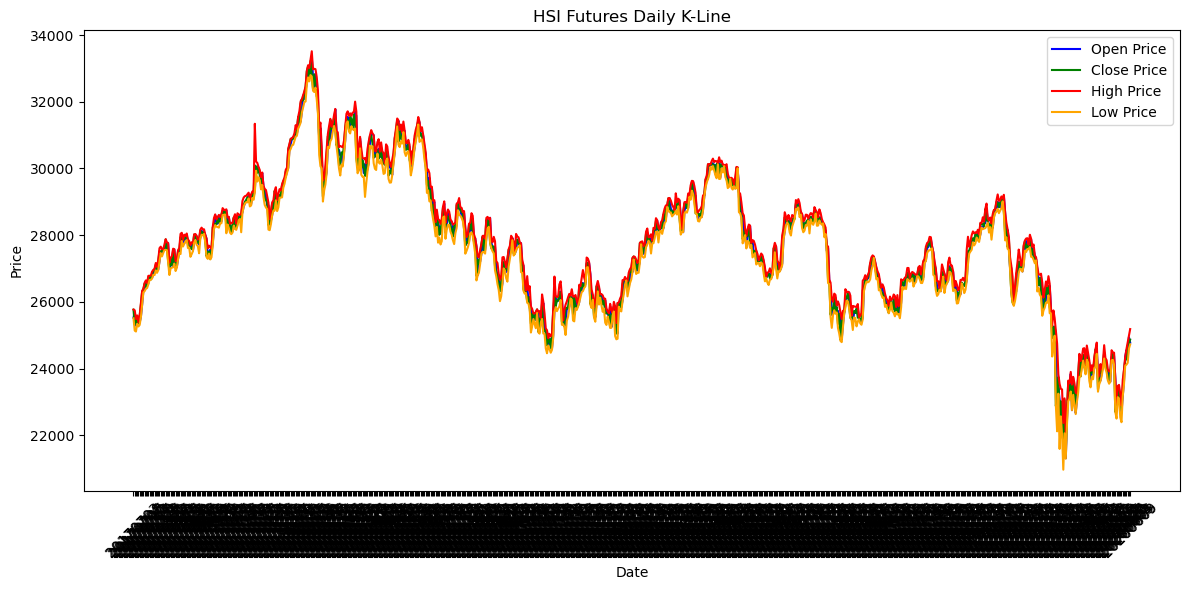

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
file_path = 'hi1_20170701_20200609.csv'
df = pd.read_csv(file_path)

# 转换数据类型，确保hi1_open, hi1_high, hi1_low, hi1_close, hi1_volume为数字
df['hi1_open'] = pd.to_numeric(df['hi1_open'], errors='coerce')
df['hi1_high'] = pd.to_numeric(df['hi1_high'], errors='coerce')
df['hi1_low'] = pd.to_numeric(df['hi1_low'], errors='coerce')
df['hi1_close'] = pd.to_numeric(df['hi1_close'], errors='coerce')
df['hi1_volume'] = pd.to_numeric(df['hi1_volume'], errors='coerce')

# 检查是否有缺失值
if df.isnull().any().any():
    print("有缺失值，开始填充")

    # 填充缺失值（使用相邻上下两行的均值填充）
    df.fillna(df.interpolate(method='linear', axis=0), inplace=True)

else:
    print("no void blank data block")

# 按日期分组并计算每一天的开盘价、收盘价、最高价、最低价
df['date'] = df['date'].astype(str)  # 确保日期列为字符串类型
day_df = df.groupby('date').agg({
    'hi1_open': 'first',  # 每天的开盘价
    'hi1_high': 'max',    # 每天的最高价
    'hi1_low': 'min',     # 每天的最低价
    'hi1_close': 'last',  # 每天的收盘价
    'hi1_volume': ['max', 'min']  # 计算最大交易量和最小交易量
}).reset_index()

# 重命名列
day_df.columns = ['date', 'hi1_open', 'hi1_high', 'hi1_low', 'hi1_close', 'hi1_volume_max', 'hi1_volume_min']

# 保存为新的 CSV 文件
day_df.to_csv('day_K_line.csv', index=False)

# 打印最大交易量和最小交易量
print(f"最大交易量: {day_df['hi1_volume_max'].max()}")
print(f"最小交易量: {day_df['hi1_volume_min'].min()}")

# 绘制K线图
plt.figure(figsize=(12, 6))
plt.plot(day_df['date'], day_df['hi1_open'], label='Open Price', color='blue')
plt.plot(day_df['date'], day_df['hi1_close'], label='Close Price', color='green')
plt.plot(day_df['date'], day_df['hi1_high'], label='High Price', color='red')
plt.plot(day_df['date'], day_df['hi1_low'], label='Low Price', color='orange')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('HSI Futures Daily K-Line')
plt.legend()
plt.tight_layout()
plt.savefig('K_line_chart.png')
plt.show()


D:\python\version\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


no void blank data block


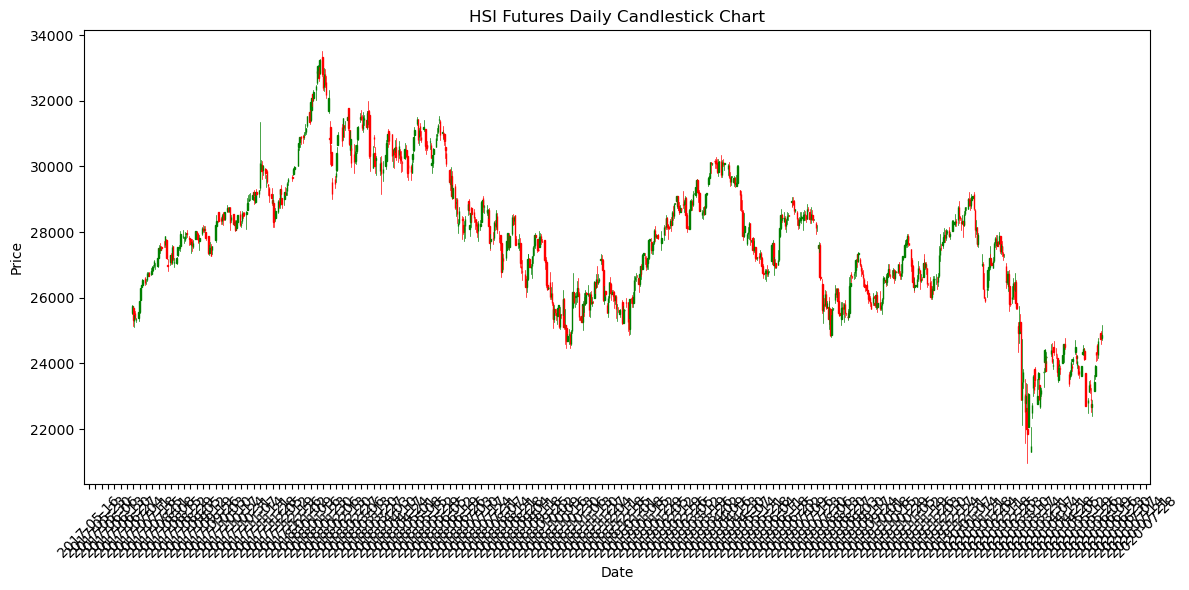

最大交易量: 6834.0
最小交易量: 0.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt

# 读取数据文件
file_path = 'hi1_20170701_20200609.csv'
df = pd.read_csv(file_path)

# 转换数据类型，确保hi1_open, hi1_high, hi1_low, hi1_close, hi1_volume为数字
df['hi1_open'] = pd.to_numeric(df['hi1_open'], errors='coerce')
df['hi1_high'] = pd.to_numeric(df['hi1_high'], errors='coerce')
df['hi1_low'] = pd.to_numeric(df['hi1_low'], errors='coerce')
df['hi1_close'] = pd.to_numeric(df['hi1_close'], errors='coerce')
df['hi1_volume'] = pd.to_numeric(df['hi1_volume'], errors='coerce')

# 检查是否有缺失值
if df.isnull().any().any():
    print("有缺失值，开始填充")

    # 填充缺失值（使用相邻上下两行的均值填充）
    df.fillna(df.interpolate(method='linear', axis=0), inplace=True)

else:
    print("no void blank data block")

# 按日期分组并计算每一天的开盘价、收盘价、最高价、最低价
df['date'] = df['date'].astype(str)  # 确保日期列为字符串类型
day_df = df.groupby('date').agg({
    'hi1_open': 'first',  # 每天的开盘价
    'hi1_high': 'max',    # 每天的最高价
    'hi1_low': 'min',     # 每天的最低价
    'hi1_close': 'last',  # 每天的收盘价
    'hi1_volume': ['max', 'min']  # 计算最大交易量和最小交易量
}).reset_index()

# 重命名列
day_df.columns = ['date', 'hi1_open', 'hi1_high', 'hi1_low', 'hi1_close', 'hi1_volume_max', 'hi1_volume_min']

# 将日期转为数字格式（matplotlib 所需）
day_df['date'] = pd.to_datetime(day_df['date'], format='%Y%m%d')
day_df['date'] = date2num(day_df['date'])

# 绘制K线图
fig, ax = plt.subplots(figsize=(12, 6))

# 使用candlestick_ohlc绘制K线图
candlestick_ohlc(ax, day_df[['date', 'hi1_open', 'hi1_high', 'hi1_low', 'hi1_close']].values, width=0.6, colorup='green', colordown='red')

# 设置日期格式
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
plt.xticks(rotation=45)

# 设置标题和标签
plt.title('HSI Futures Daily Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')

plt.tight_layout()
plt.savefig('K_line_chart.png')
plt.show()

# 打印最大交易量和最小交易量
print(f"最大交易量: {day_df['hi1_volume_max'].max()}")
print(f"最小交易量: {day_df['hi1_volume_min'].min()}")


no void blank data block


D:\python\version\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


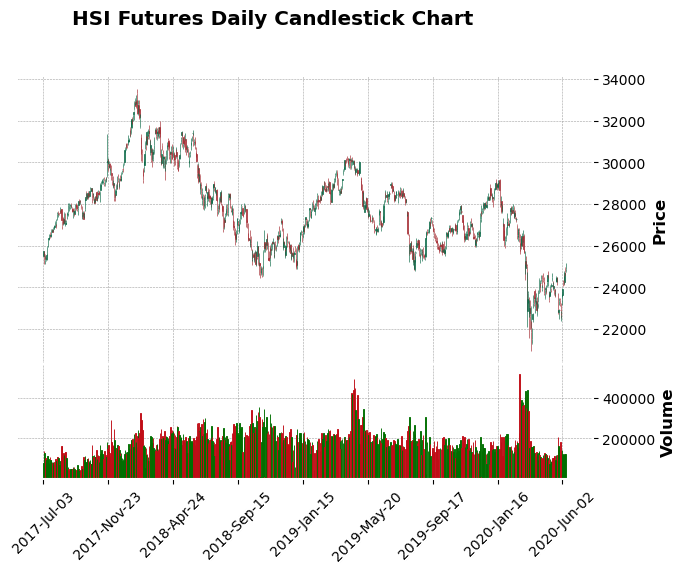

最大交易量: 516098.0
最小交易量: 1381.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# 读取数据文件
file_path = 'hi1_20170701_20200609.csv'
df = pd.read_csv(file_path)

# 转换数据类型，确保hi1_open, hi1_high, hi1_low, hi1_close, hi1_volume为数字
df['hi1_open'] = pd.to_numeric(df['hi1_open'], errors='coerce')
df['hi1_high'] = pd.to_numeric(df['hi1_high'], errors='coerce')
df['hi1_low'] = pd.to_numeric(df['hi1_low'], errors='coerce')
df['hi1_close'] = pd.to_numeric(df['hi1_close'], errors='coerce')
df['hi1_volume'] = pd.to_numeric(df['hi1_volume'], errors='coerce')

# 检查是否有缺失值
if df.isnull().any().any():
    print("有缺失值，开始填充")

    # 填充缺失值（使用相邻上下两行的均值填充）
    df.fillna(df.interpolate(method='linear', axis=0), inplace=True)

else:
    print("no void blank data block")

# 按日期分组并计算每一天的开盘价、收盘价、最高价、最低价
df['date'] = df['date'].astype(str)  # 确保日期列为字符串类型
day_df = df.groupby('date').agg({
    'hi1_open': 'first',  # 每天的开盘价
    'hi1_high': 'max',    # 每天的最高价
    'hi1_low': 'min',     # 每天的最低价
    'hi1_close': 'last',  # 每天的收盘价
    'hi1_volume': 'sum'   # 使用交易量的总和来表示Volume
}).reset_index()

# 重命名列
day_df.columns = ['date', 'Open', 'High', 'Low', 'Close', 'Volume']

# 将日期转为datetime格式（mplfinance 所需）
day_df['date'] = pd.to_datetime(day_df['date'], format='%Y%m%d')

# 设置数据格式
day_df.set_index('date', inplace=True)

# 绘制K线图
mpf.plot(day_df, type='candle', style='charles', title='HSI Futures Daily Candlestick Chart',
         ylabel='Price', volume=True, ylabel_lower='Volume')

# 打印最大交易量和最小交易量
print(f"最大交易量: {day_df['Volume'].max()}")
print(f"最小交易量: {day_df['Volume'].min()}")
